In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
%run utils.py

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser="auto")
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [11]:
np.sqrt(len(mnist["data"][0]))

28.0

In [13]:
mnist["data"][0].reshape(28, 28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [4]:
DIRECTION_MAP: dict = {
    "UP":{"direction": -1, "axis":0},
    "DOWN":{"direction": 1, "axis":0},
    "LEFT":{"direction": -1, "axis":1},
    "RIGHT":{"direction": 1, "axis":1}
}
def shift_image(image_vector: np.array, direction: str, steps: int, resolution_x: int, resolution_y: int):

    direction_upper: str = direction.upper()

    if len(image_vector) != resolution_x*resolution_y:
        raise ValueError(f"Vector elements {len(image_vector)} differs from intended reshape {resolution_x*resolution_y}")

    M1 = image_vector.reshape(resolution_x, resolution_y)
    M1 = np.roll(M1, steps*DIRECTION_MAP[direction_upper]["direction"], DIRECTION_MAP[direction_upper]["axis"])

    return M1.reshape(-1)

def shift_digits(mnist: np.array):
    augmented_digits: list = []
    augmented_targets: list = []

    for position in range(len(mnist.data)):
        digit = mnist["data"][position]
        digit_up = shift_image(digit, "up", 1, 28,28)
        digit_down = shift_image(digit, "down", 1, 28,28)
        digit_left = shift_image(digit, "left", 1, 28,28)
        digit_right = shift_image(digit, "right", 1, 28,28)
        target = mnist["target"][position]
        augmented_digits += [digit_up, digit_down, digit_left, digit_right]
        augmented_targets += [target]*4
    return augmented_digits, augmented_targets


## Tests

(-0.5, 27.5, 27.5, -0.5)

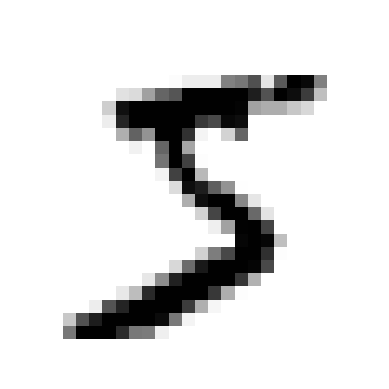

In [126]:
digit = mnist["data"][0]
plt.imshow(digit.reshape(28,28), cmap=mpl.cm.binary)
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

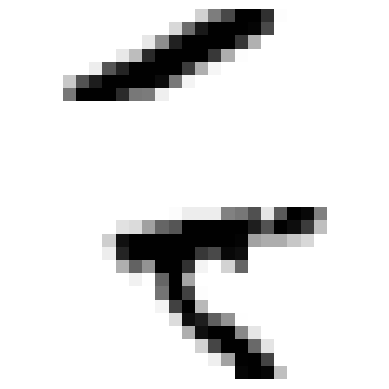

In [127]:
digit_2 = shift_image(digit, "down", 10, 28,28)
plt.imshow(digit_2.reshape(28,28), cmap=mpl.cm.binary)
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

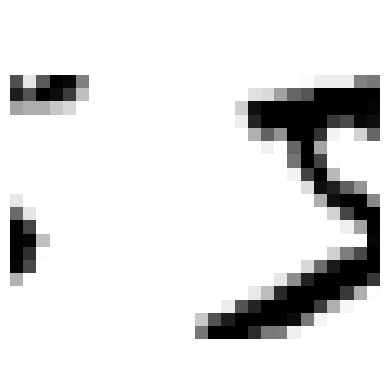

In [128]:
digit_2 = shift_image(digit, "right", 10, 28,28)
plt.imshow(digit_2.reshape(28,28), cmap=mpl.cm.binary)
plt.axis("off")

In [26]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser="auto")
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [27]:
new_digits, new_targets = shift_digits(mnist)
mnist.data = np.append(mnist.data, np.array(new_digits), axis=0)
mnist.target = np.append(mnist.target, np.array(new_targets), axis=0)

In [28]:
len(mnist.data), len(mnist.target)

(350000, 350000)

In [16]:
mnist.targets = np.append(mnist.target, np.array(new_targets), axis=0)

In [17]:
len(mnist.targets)

350000

## Numpy Roll Test

In [130]:
[2]*4

[2, 2, 2, 2]

In [95]:
M = np.zeros((3,3))

In [96]:
M[0] = 1

In [19]:
M

array([[1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [23]:
np.roll(M, -1, axis=0)

array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.]])

In [24]:
M = np.zeros((3,3))
M[:,0] = 1

In [30]:
M[:,0] = 1

In [31]:
M

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [33]:
np.roll(M, 1, axis=1)

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [34]:
np.roll(M, -1, axis=1)

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [69]:
shift_image(np.zeros(9), "up", 1, 4, 3)

ValueError: Vector elements 9 differs from intended reshape 12

In [70]:
shift_image(np.zeros(9), "up", 1, 3,3)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [71]:
M = np.zeros((3,3))
M[:,0] = 1
M = M.reshape(-1)
M

array([1., 0., 0., 1., 0., 0., 1., 0., 0.])

In [72]:
shift_image(M, "up", 1, 3,3)

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [73]:
shift_image(M, "left", 1, 3,3)

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [74]:
shift_image(M, "right", 1, 3,3)

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [75]:
M = np.zeros((3,3))
M[0] = 1
M

array([[1., 1., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [78]:
shift_image(M.reshape(-1), "DOWN", 1, 3,3)

array([[0., 0., 0.],
       [1., 1., 1.],
       [0., 0., 0.]])

In [79]:
shift_image(M.reshape(-1), "UP", 1, 3,3)

array([[0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.]])